In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.models import Sequential
from keras.layers import LSTM, Dense

In [3]:
train = pd.read_csv('Google_Stock_Price_Train.csv')
train

,Date,Open,High,Low,Close,Volume
0,01/03/2012,325.250000,332.830000,324.970000,663.59,"7,380,500"
1,01/04/2012,331.270000,333.870000,329.080000,666.45,"5,749,400"
2,01/05/2012,329.830000,330.750000,326.890000,657.21,"6,590,300"
3,01/06/2012,328.340000,328.770000,323.680000,648.24,"5,405,900"
4,01/09/2012,322.040000,322.290000,309.460000,620.76,"11,688,800"
...,...,...,...,...,...,...
1504,22/12/2017,1061.109985,1064.199951,1059.439941,1060.119995,755100
1505,26/12/2017,1058.069946,1060.119995,1050.199951,1056.73999,760600
1506,27/12/2017,1057.390015,1058.369995,1048.050049,1049.369995,1271900
1507,28/12/2017,1051.599976,1054.750000,1044.770020,1048.140015,837100


In [4]:
test = pd.read_csv('Google_Stock_Price_Test.csv')
test

,Date,Open,High,Low,Close,Volume
0,02/01/2018,1048.339966,1066.939941,1045.229980,1065.000000,1237600
1,03/01/2018,1064.310059,1086.290039,1063.209961,1082.479980,1430200
2,04/01/2018,1088.000000,1093.569946,1084.001953,1086.400024,1004600
3,05/01/2018,1094.000000,1104.250000,1092.000000,1102.229980,1279100
4,08/01/2018,1102.229980,1111.270020,1101.619995,1106.939941,1047600
...,...,...,...,...,...,...
120,25/06/2018,1143.599976,1143.910034,1112.780029,1124.810059,2157300
121,26/06/2018,1128.000000,1133.209961,1116.659058,1118.459961,1563200
122,27/06/2018,1121.339966,1131.836060,1103.619995,1103.979980,1293900
123,28/06/2018,1102.089966,1122.310059,1096.010010,1114.219971,1072400


In [5]:
train.describe()

,Open,High,Low
count,1509.000000,1509.000000,1509.000000
mean,598.150026,602.587780,593.266736
std,202.607234,203.793158,201.418625
min,279.120000,281.210000,277.220000
25%,436.860000,438.780000,434.180000
50%,563.710000,568.930000,558.470000
75%,752.920000,758.130000,746.060000
max,1075.199951,1078.489990,1063.550049


In [6]:
test.describe()

,Open,High,Low,Close,Volume
count,125.000000,125.000000,125.000000,125.000000,1.250000e+02
mean,1091.623677,1103.253992,1080.415168,1092.058077,1.776521e+06
std,47.793429,45.220728,49.907919,48.044551,7.207634e+05
min,993.409973,1020.989990,980.640015,1001.520020,7.568000e+05
25%,1052.000000,1066.939941,1045.910034,1053.910034,1.293900e+06
50%,1090.569946,1104.250000,1085.150024,1094.800049,1.563200e+06
75%,1131.069946,1137.859985,1117.832031,1129.790039,2.057700e+06
max,1177.329956,1186.890015,1171.979980,1175.839966,4.857900e+06


In [7]:
train.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close      object
Volume     object
dtype: object

In [8]:
test.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

In [9]:
train['Close'] = train['Close'].str.replace(',','')
train['Close'] = train['Close'].astype('float64')
train.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume     object
dtype: object

In [10]:
train['Close'].values

array([ 663.59    ,  666.45    ,  657.21    , ..., 1049.369995,
       1048.140015, 1046.400024])

In [11]:
train['Close'].values.reshape(-1,1)

array([[ 663.59    ],
       [ 666.45    ],
       [ 657.21    ],
       ...,
       [1049.369995],
       [1048.140015],
       [1046.400024]])

In [12]:
test['Close'].values

array([1065.      , 1082.47998 , 1086.400024, 1102.22998 , 1106.939941,
       1106.26001 , 1102.609985, 1105.52002 , 1122.26001 , 1121.76001 ,
       1131.97998 , 1129.790039, 1137.51001 , 1155.810059, 1169.969971,
       1164.23999 , 1170.369995, 1175.839966, 1175.579956, 1163.689941,
       1169.939941, 1167.699951, 1111.900024, 1055.800049, 1080.599976,
       1048.579956, 1001.52002 , 1037.780029, 1051.939941, 1052.099976,
       1069.699951, 1089.52002 , 1094.800049, 1102.459961, 1111.339966,
       1106.630005, 1126.790039, 1143.75    , 1118.290039, 1104.72998 ,
       1069.52002 , 1078.920044, 1090.930054, 1095.060059, 1109.640015,
       1126.      , 1160.040039, 1164.5     , 1138.170044, 1149.48999 ,
       1149.579956, 1135.72998 , 1099.819946, 1097.709961, 1090.880005,
       1049.079956, 1021.570007, 1053.209961, 1005.099976, 1004.559998,
       1031.790039, 1006.469971, 1013.409973, 1025.140015, 1027.810059,
       1007.039978, 1015.450012, 1031.640015, 1019.969971, 1032.

In [14]:
scaler = MinMaxScaler()

In [17]:
train_scaled = scaler.fit_transform(train['Close'].values.reshape(-1,1))
train_scaled

array([[0.23757287],
       [0.24151427],
       [0.22878051],
       ...,
       [0.76922122],
       [0.76752617],
       [0.76512827]])

In [18]:
test_scaled = scaler.fit_transform(test['Close'].values.reshape(-1,1))
test_scaled

array([[0.36415787],
       [0.46443314],
       [0.48692078],
       [0.57773056],
       [0.60474962],
       [0.60084914],
       [0.57991049],
       [0.59660413],
       [0.69263439],
       [0.6897661 ],
       [0.74839376],
       [0.73583099],
       [0.78011721],
       [0.88509687],
       [0.96632631],
       [0.93345583],
       [0.96862108],
       [1.        ],
       [0.99850843],
       [0.93030043],
       [0.96615405],
       [0.95330417],
       [0.63320352],
       [0.31138163],
       [0.45364835],
       [0.269963  ],
       [0.        ],
       [0.20800838],
       [0.28923782],
       [0.29015587],
       [0.39111951],
       [0.50481888],
       [0.53510818],
       [0.57904986],
       [0.62999071],
       [0.60297165],
       [0.71862126],
       [0.8159134 ],
       [0.66986034],
       [0.59207201],
       [0.39008732],
       [0.44401129],
       [0.51290765],
       [0.53659975],
       [0.62023881],
       [0.71408914],
       [0.90936248],
       [0.934

In [21]:
def create_seq(data,time_step=6):
    X = []
    Y = []
    for i in range(len(data) - time_step):
        X.append(data[i : i + time_step])
        Y.append(data[i + time_step])
    return np.array(X), np.array(Y)

In [22]:
X_train, y_train = create_seq(train_scaled)
X_train.shape, y_train.shape

((1503, 6, 1), (1503, 1))

In [23]:
X_test, y_test = create_seq(test_scaled)
X_test.shape, y_test.shape

((119, 6, 1), (119, 1))

In [20]:
model = Sequential()

In [24]:
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 6, 50)             10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 30651 (119.73 KB)
Trainable params: 30651 (119.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
history = model.fit(X_train,y_train,batch_size=4,epochs=100,validation_split=0.05)

Epoch 1/100
357/357 [==============================] - 6s 7ms/step - loss: 0.0089 - val_loss: 5.6220e-04
Epoch 2/100
357/357 [==============================] - 2s 5ms/step - loss: 0.0027 - val_loss: 5.1239e-04
Epoch 3/100
357/357 [==============================] - 2s 5ms/step - loss: 0.0023 - val_loss: 0.0041
Epoch 4/100
357/357 [==============================] - 2s 5ms/step - loss: 0.0024 - val_loss: 0.0052
Epoch 5/100
357/357 [==============================] - 2s 5ms/step - loss: 0.0020 - val_loss: 0.0013
Epoch 6/100
357/357 [==============================] - 2s 5ms/step - loss: 0.0017 - val_loss: 0.0014
Epoch 7/100
357/357 [==============================] - 2s 5ms/step - loss: 0.0016 - val_loss: 5.3893e-04
Epoch 8/100
357/357 [==============================] - 2s 5ms/step - loss: 0.0013 - val_loss: 4.0602e-04
Epoch 9/100
357/357 [==============================] - 2s 5ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 10/100
357/357 [==============================] - 2s 5ms/step - loss:

357/357 [==============================] - 2s 6ms/step - loss: 7.7441e-04 - val_loss: 1.9765e-04
Epoch 77/100
357/357 [==============================] - 2s 6ms/step - loss: 7.1993e-04 - val_loss: 2.3180e-04
Epoch 78/100
357/357 [==============================] - 2s 5ms/step - loss: 7.4096e-04 - val_loss: 4.0345e-04
Epoch 79/100
357/357 [==============================] - 2s 5ms/step - loss: 7.5108e-04 - val_loss: 5.1916e-04
Epoch 80/100
357/357 [==============================] - 2s 5ms/step - loss: 7.7990e-04 - val_loss: 3.1367e-04
Epoch 81/100
357/357 [==============================] - 2s 5ms/step - loss: 7.3587e-04 - val_loss: 1.9325e-04
Epoch 82/100
357/357 [==============================] - 2s 5ms/step - loss: 7.6464e-04 - val_loss: 2.2878e-04
Epoch 83/100
357/357 [==============================] - 2s 6ms/step - loss: 7.0858e-04 - val_loss: 1.9145e-04
Epoch 84/100
357/357 [==============================] - 2s 6ms/step - loss: 7.5099e-04 - val_loss: 2.1780e-04
Epoch 85/100
357/357 [=

In [26]:
y_pred = model.predict(X_test)
y_pred

4/4 [==============================] - 1s 2ms/step


array([[0.6053749 ],
       [0.5767918 ],
       [0.6000306 ],
       [0.71863973],
       [0.69737804],
       [0.7731966 ],
       [0.73450524],
       [0.7979769 ],
       [0.92149574],
       [1.0047809 ],
       [0.92962354],
       [0.98378015],
       [0.99894965],
       [0.99435556],
       [0.89763397],
       [0.968938  ],
       [0.93020725],
       [0.54518276],
       [0.27623785],
       [0.4519801 ],
       [0.25384462],
       [0.03480951],
       [0.2204826 ],
       [0.29450423],
       [0.28789577],
       [0.39162105],
       [0.5188013 ],
       [0.5462659 ],
       [0.59123015],
       [0.6437565 ],
       [0.60162073],
       [0.7517433 ],
       [0.85275424],
       [0.642123  ],
       [0.57554877],
       [0.35420898],
       [0.4477046 ],
       [0.52153873],
       [0.5492007 ],
       [0.6441363 ],
       [0.74585223],
       [0.9899006 ],
       [0.96159655],
       [0.7477958 ],
       [0.86254966],
       [0.8307657 ],
       [0.7505284 ],
       [0.513

In [27]:
y_pred = scaler.inverse_transform(y_pred)
y_pred

array([[1107.049  ],
       [1102.0663 ],
       [1106.1173 ],
       [1126.7933 ],
       [1123.0869 ],
       [1136.3036 ],
       [1129.559  ],
       [1140.6233 ],
       [1162.1552 ],
       [1176.6733 ],
       [1163.5719 ],
       [1173.0125 ],
       [1175.6569 ],
       [1174.8561 ],
       [1157.9955 ],
       [1170.4252 ],
       [1163.6737 ],
       [1096.5563 ],
       [1049.6738 ],
       [1080.3092 ],
       [1045.7703 ],
       [1007.588  ],
       [1039.9546 ],
       [1052.858  ],
       [1051.7059 ],
       [1069.7874 ],
       [1091.9574 ],
       [1096.7451 ],
       [1104.5831 ],
       [1113.7396 ],
       [1106.3945 ],
       [1132.5638 ],
       [1150.1721 ],
       [1113.4548 ],
       [1101.8496 ],
       [1063.2657 ],
       [1079.5638 ],
       [1092.4346 ],
       [1097.2566 ],
       [1113.8059 ],
       [1131.5369 ],
       [1174.0795 ],
       [1169.1455 ],
       [1131.8757 ],
       [1151.8796 ],
       [1146.3391 ],
       [1132.352  ],
       [1091.

In [28]:
y_test = scaler.inverse_transform(y_test)
y_test

array([[1102.609985],
       [1105.52002 ],
       [1122.26001 ],
       [1121.76001 ],
       [1131.97998 ],
       [1129.790039],
       [1137.51001 ],
       [1155.810059],
       [1169.969971],
       [1164.23999 ],
       [1170.369995],
       [1175.839966],
       [1175.579956],
       [1163.689941],
       [1169.939941],
       [1167.699951],
       [1111.900024],
       [1055.800049],
       [1080.599976],
       [1048.579956],
       [1001.52002 ],
       [1037.780029],
       [1051.939941],
       [1052.099976],
       [1069.699951],
       [1089.52002 ],
       [1094.800049],
       [1102.459961],
       [1111.339966],
       [1106.630005],
       [1126.790039],
       [1143.75    ],
       [1118.290039],
       [1104.72998 ],
       [1069.52002 ],
       [1078.920044],
       [1090.930054],
       [1095.060059],
       [1109.640015],
       [1126.      ],
       [1160.040039],
       [1164.5     ],
       [1138.170044],
       [1149.48999 ],
       [1149.579956],
       [11

In [32]:
d = pd.DataFrame({"y_test": y_test[:,0],"y_pred":y_pred[:,0]})
d

,y_test,y_pred
0,1102.609985,1107.048950
1,1105.520020,1102.066284
2,1122.260010,1106.117310
3,1121.760010,1126.793335
4,1131.979980,1123.086914
...,...,...
114,1124.810059,1153.638794
115,1118.459961,1113.471558
116,1103.979980,1115.622437
117,1114.219971,1098.088379


In [34]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 326.6930714445557
Mean Absolute Error: 13.986578960215335


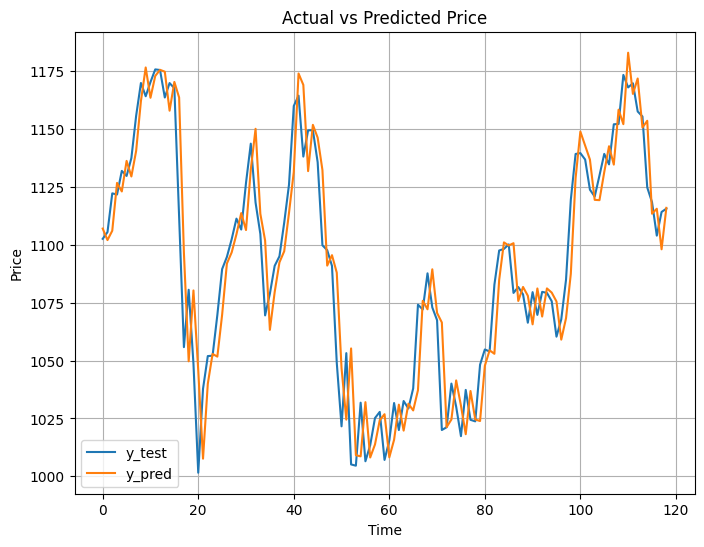

In [37]:
plt.figure(figsize=(8,6))

plt.plot(d['y_test'], label='y_test')
plt.plot(d['y_pred'], label='y_pred')

plt.title('Actual vs Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()